# Modeling and basic analysis of spike trains, some bursting included
### Marco Arieli Herrera-Valdez 
### Mathematical and Biophysical Physiology,
### Facultad de Ciencias, UNAM
##### Last revised: Jan 1, 2017

This tutorial provides a brief description of the steps one could follow to model spike trains from the distribution of their interspike intervals, $y$. Interspike intervals can have many different distributions depending on the intrinsic properties of a neuron. The modulation of such properties by substances in the neuronal microenvironment exerts powerful effects on the distribution of interspike intervals, and on the packets of action potentials generated by the neuron. Some spike trains contain "packets" of action potentials called _bursts_. One issue that remains to be solved, is that of defining precisely what a burst is, and how to detect them from real data. 



Let $t_0$, $t_1$,... represent the times at which a given neuron fires action potentials. The interspike intervals are then defined as $u_i = t_{i+i} - t_i$, for $i=1,...,n$; for consistency, define $u_0 =0$. Let $\lambda$ represent the mean interspike interval. As a first approximation, assume that the interspike intervals are gamma distributed. Then,
\begin{equation}
P(u; \alpha,\lambda) = \frac{ \lambda^{\alpha} u ^{\alpha -1} e^{- \lambda u}}{\Gamma(\alpha) }.
\end{equation}
The parameter $\alpha$ is called the _scale factor_.

#### Simulations in python
Now import modules that will be used to model spike trains. 

In [1]:
import scipy as sc
import matplotlib.pyplot as gr
%matplotlib inline

## Gamma-distributed interspike intervals
Let $\lambda$ represent the mean interspike interval and $\alpha$ 

As a first approximation, assume that the interspike intervals are gamma distributed:
\begin{equation}
P(\tau; \alpha,\lambda) = \frac{ \lambda^{\alpha} \tau ^{\alpha -1} e^{- \lambda \tau}}{\Gamma(\alpha) }.
\end{equation}
The parameter $\alpha$ is called the _scale factor_

If we let $\theta= \lambda^{-1}$, the inverse of the mean interspike interval, then  
\begin{equation}
P(\tau; \alpha,\theta) = \frac{ \tau ^{\alpha -1} e^{-\frac{\tau}{\theta} }}{\Gamma(\alpha) \theta^{\alpha}}
\end{equation}
The parameters $\alpha$ and $\theta = 1/\lambda$ are called _scale factor_ and _shape factor_, respectively.  Notice that, if he scale shape factor equals 1, then then $p$ describes an exponential pdf. The _shape factor_ is thus the analog of the mean interspike interval.

To simulate a gamma interspike interval distribution, set first a few parameters. The form of the gamma distribution used in python is like second equation above. The train is homogeneous if the mean interspike interval is constant and non-homogeneous otherwise. 

In [2]:
# Parameters for the trains 
meanISI=10;  nSpikes= 1000; nTrains=100;

Now obtain samples for the interspike intervals and calculate cumulative sums to obtain (homogeneous) trains. 

In [3]:
isiSample=sc.random.gamma(shape=2.0, scale=meanISI, size=(nTrains,nSpikes))
spikeTrains= isiSample.cumsum(1)
isiBins=sc.arange(0,200)
nBins= len(isiBins)-1

Now plot the spike trains and the histograms from the samples

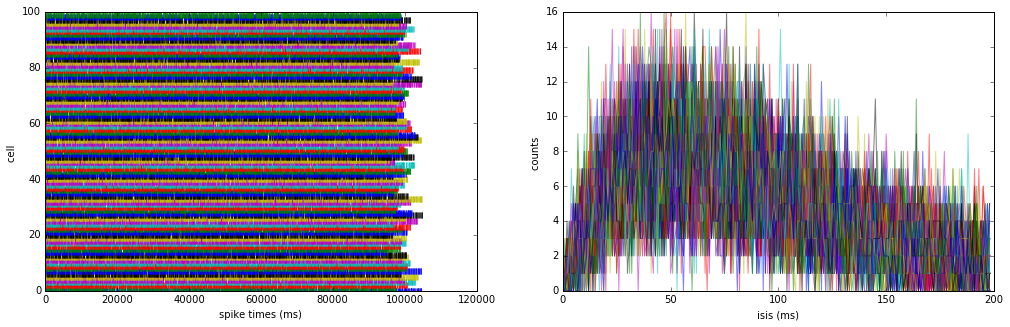

In [13]:
fig=gr.figure(figsize=(17,5)); gr.ioff()
rows=1; cols=2
axTrains=fig.add_subplot(rows,cols,1)
axHist=fig.add_subplot(rows,cols,2)
for n in sc.arange(nTrains):
	counts,isiBins= sc.histogram(isiSample[n],isiBins)
	axTrains.plot(spikeTrains[n],n*sc.ones(nSpikes),'|')
	#axHist.bar(left=isiBins[:-1],height=counts,width=0.9)
	axHist.plot(isiBins[:-1],counts,alpha=0.5)

axHist.set_xlabel("isis (ms)")
axHist.set_ylabel("counts ")
axTrains.set_xlabel("spike times (ms)")
axTrains.set_ylabel("cell ")
gr.ion(), gr.draw(); 

Examples:
    1. Modify the code above to obtain spike trains with different rates
    2. Calculate the average histogram (average the variable counts above) and graph the result on top of all the histograms.
    3. How would you turn the homogeneous spike trains from above into non-homogeneous spike trains (rate changes during the train).

A1. Use the randint function in scipy.random. 

First generate an array of rates

In [5]:
minRate=3; maxRate=20; nTrainsR=100
meanISIs=sc.random.randint(minRate,maxRate,nTrains)

Now let us convert the calculation above into a function.

In [6]:
def nGammaTrains(rates, nSpikes= 1000, nTrains=10):
    if len(rates)<1:
        rates= 100* sc.rand(nTrains)
    isiSample=sc.zeros((nTrains,nSpikes))
    for n in sc.arange(nTrains):
        isiSample[n]=sc.random.gamma(shape=2.0, scale=meanISIs[n], size=(nSpikes))
    spikeTrains= isiSample.cumsum(1)
    return spikeTrains

Let us create another function to plot the raster from an array of spike trains

In [7]:
def plotNRasters(ax,trainArray):
    for n in sc.arange(nTrainsR):
        axTrains.plot(spikeTrains[n], n*sc.ones(nSpikes),'|')
        axTrains.text(0.9*maxTime,n, "%d Hz"%meanISIs[n])
    
    axTrains.set_xlabel("spike times (ms)")
    axTrains.set_ylabel("cell ")
    axTrains.set_ylim(-1,nTrains)
    return ax

Graph a new batch of spike trains

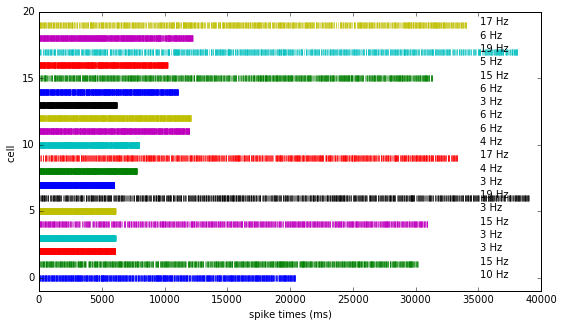

In [8]:
nTrainsR=20
spikeTrains= nGammaTrains(meanISIs,nTrains=nTrainsR) # Why does the function not have all arguments? 
maxTime=spikeTrains.max()
fig=gr.figure(figsize=(9,5)); gr.ioff()
rows=1; cols=1
axTrains=fig.add_subplot(rows,cols,1)
plotNRasters(axTrains,spikeTrains)
axTrains.set_xlabel("spike times (ms)")
axTrains.set_ylabel("cell ")
axTrains.set_ylim(-1,nTrainsR)
gr.ion(), gr.draw(); 

A2. Now graph the trains and the histograms for the interspike intervals

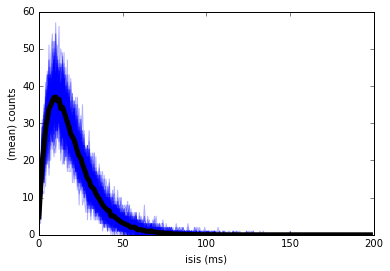

In [9]:
isiHist= sc.zeros((nTrains,nBins))
for n in sc.arange(nTrains):
    counts,isiBins= sc.histogram(isiSample[n],isiBins)
    isiHist[n]=counts
meanCount=isiHist.mean(0)
#
gr.figure()
gr.ioff()
for n in sc.arange(nTrains):
    gr.plot(isiBins[:-1],isiHist[n],'b',alpha=0.3)
    
gr.plot(isiBins[:-1],meanCount,"k",linewidth=5)
gr.xlabel("isis (ms)")
gr.ylabel("(mean) counts")
gr.ion(); gr.draw()


A3. Non-homogeneous spike trains from gamma-distributions.

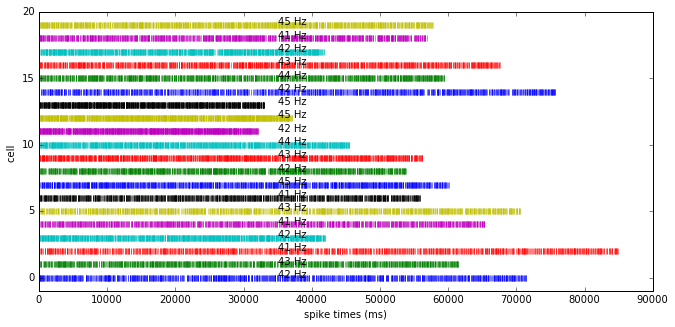

In [14]:
nSpikes= 1000; nTrains=100;
isis=sc.zeros((nTrains,nSpikes))
spikeTrains=sc.zeros((nTrains,nSpikes))
for m in sc.arange(nTrains):
    a,b= sc.sort(sc.random.randint(10,50,2))
    if a==b:
        b=a+1
    meanISIs=sc.random.randint(a,b, nSpikes);  
    for n in sc.arange(nSpikes):
        isis[m,n]=sc.random.gamma(shape=2.0, scale=meanISIs[n])
    spikeTrains[m]= isis[m].cumsum()
    
fig=gr.figure(figsize=(11,5)); gr.ioff()
rows=1; cols=1
axTrains=fig.add_subplot(rows,cols,1)
plotNRasters(axTrains,spikeTrains)
axTrains.set_xlabel("spike times (ms)")
axTrains.set_ylabel("cell ")
axTrains.set_ylim(-1,nTrainsR)
gr.ion(), gr.draw(); 